## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Goal
 We're working with a real estate agency that helps customers buy and sell houses. Using Linear Regression to analyze the given dataset, we will help the agency determine which features of a house will increase the value the most. In turn, that will help the agency advise customers whether they should make renovations to the house, and which renovations they should consider.    

## Data
This project uses the King County House Sales dataset (kc_house_data.csv), which contains 21,597 different house entries. Each entry contains information about the house such as date sold, number of bedrooms and bathroom, total square footage, etc. A full  list and description of the column/variables can be found in column_names.md.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's open the csv file
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Let's check for null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
#Let's check the three variables to see what values they have to make sure it's safe to remove null values

In [6]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [7]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [8]:
df.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [9]:
#Looks safe to remove the null values since: 

#For waterfront there should only be "yes" or "no"
#For yr_renovated we don't want missing/unknown values
#For view we also don't want missing/unknown values

df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [10]:
#Let's check for duplicates as well

df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

# Baseline Model

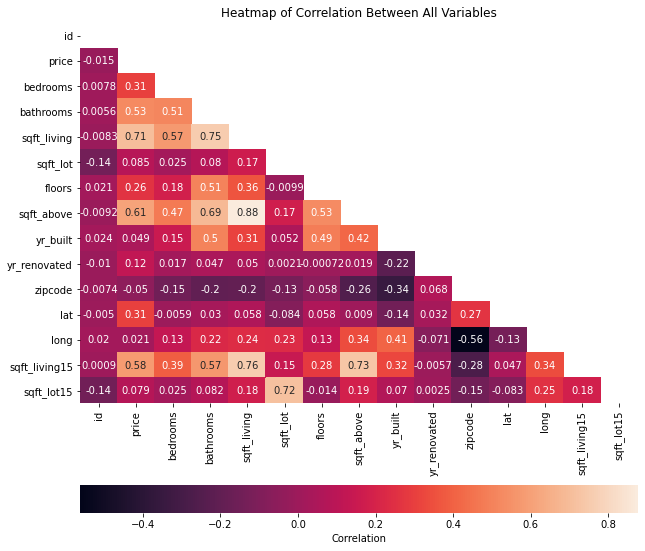

In [11]:
#Let's start off by creating a baseline model
#Let's look at the correlation strengths to find the variable with the strongest correlation with the target variable (price)
#We'll use a heatmap

correlation = df.corr()
#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");

#### Looking at the variables correlated with price, it looks like the one most strongly correlated is sqft_living. Let's start creating our regression formula using price and sqft_living. ####

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Create our formula structure
form = "price~sqft_living"

#Fit our model with ols
model = ols(formula = form, data = df).fit()

#Look at model information
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:19:07   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.516e+04   5205.744    -10.597      0.000   -6.54e+04    -4.5e+04
sqft_living   286.1494      2.285    125.214      0.000     281.670     290.629
==============================================================================
Omnibus:                    11136.965   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457340.013
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      28.739   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
print("R-Squared:", model.rsquared)
print(model.params)

R-Squared: 0.49870320658566647
Intercept     -55164.727008
sqft_living      286.149370
dtype: float64


## Let's check some regression assumptions ##

### 1. Linearity ###

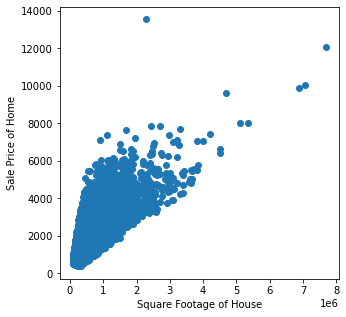

In [14]:
#Let's plot the relationship between price and sqft_living
plt.figure(figsize = (5,5))
plt.scatter(df.price, df.sqft_living);
plt.xlabel("Square Footage of House")
plt.ylabel("Sale Price of Home");

### 2. Normality ###

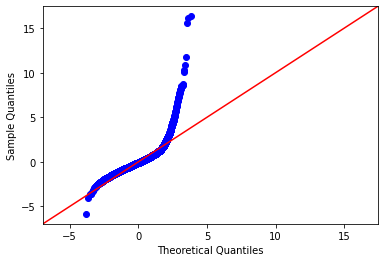

In [15]:
import scipy.stats as stats

#Let's plot the residuals against a standard normal distribution 
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

### 3. Homoscedasticity ###

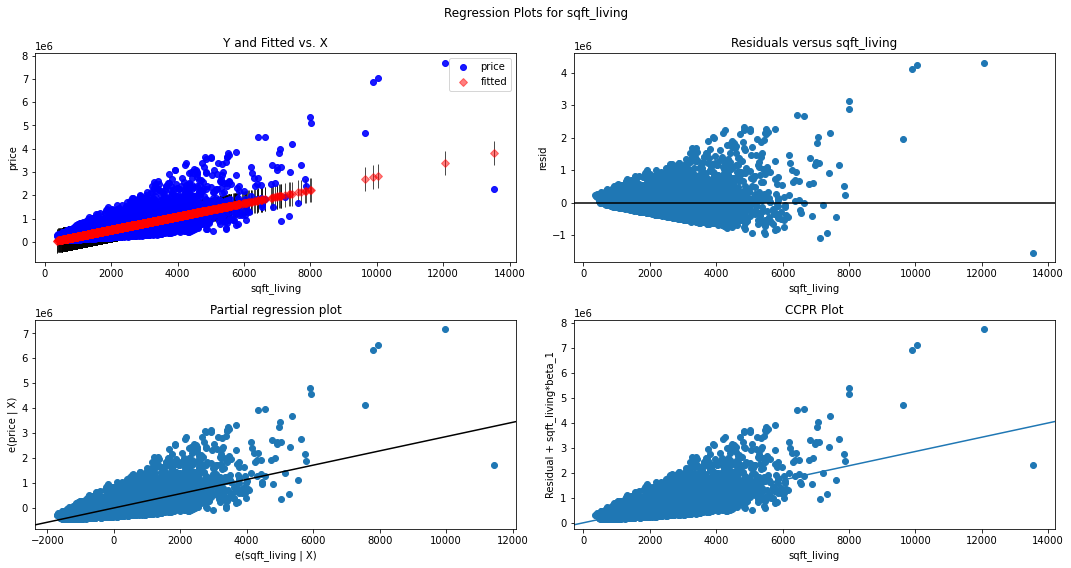

In [16]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig);

From testing our assumptions we can see:
* There is only a slight linear relationship between price and sqft_living
* The model residuals do not follow a full normal distribution
* For our regression plots for sqft_living, we see a cone shape which indicates heteroscedasticity


#### Since our R-squared is low and our regression assumptions are not met, we can say that sqft_living is not ideal for modeling a relationship with price. We will need to take a look at additional variables and build a better model. To do this requires multilinear regression. ####

# Second Model

In [17]:
#Let's take a look at our dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

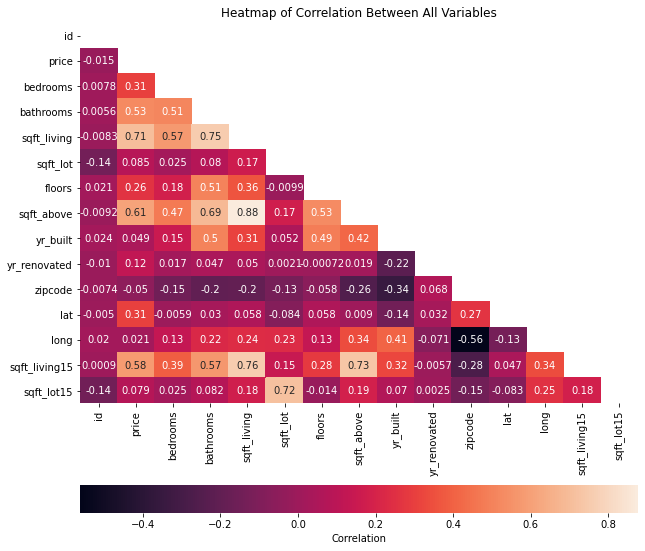

In [18]:
#There's a lot of variables so let's see if we can eliminate some variables
#First we'll create a heatmap to look at the correlation strengths
#We can also use this to check for multicollinearity
correlation = df.corr()

#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");

### Looking at the heatmap correlation strengths, we can eliminate some low correlation variables:
* id (also a unique identifier which will not help us in the future for predictions)
* sqft_lot
* yr_renovated
* zipcode
* long
* lat (If we don't need longitude, it doesn't make sense to only put latitude)
* sqft_lot15 (We are not concerned about other neighbor's properties)

### We can eliminate some other variables as well:
* date (not in heatmap, but we're worried about the future and not the past)
* sqft_above (don't need this when we have total square footage)
* sqft_basement (not in heatmap, but sqft of basement is already included in sqft_living)
* sqft_living15 (we are not concerned about other neighbor's properties)


In [19]:
#Let's drop the variables
df.drop(columns = ["id","date", "sqft_lot", "sqft_above", "sqft_basement", "yr_renovated", "zipcode", "lat", "long", "sqft_lot15", "sqft_living15"], axis = 1, inplace = True)

In [20]:
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
1,538000.0,3,2.25,2570,2.0,NO,NONE,Average,7 Average,1951
3,604000.0,4,3.00,1960,1.0,NO,NONE,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,1.0,NO,NONE,Average,8 Good,1987
5,1230000.0,4,4.50,5420,1.0,NO,NONE,Average,11 Excellent,2001
6,257500.0,3,2.25,1715,2.0,NO,NONE,Average,7 Average,1995
...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,NO,NONE,Average,8 Good,2008
21592,360000.0,3,2.50,1530,3.0,NO,NONE,Average,8 Good,2009
21593,400000.0,4,2.50,2310,2.0,NO,NONE,Average,8 Good,2014
21594,402101.0,2,0.75,1020,2.0,NO,NONE,Average,7 Average,2009


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        15762 non-null  float64
 1   bedrooms     15762 non-null  int64  
 2   bathrooms    15762 non-null  float64
 3   sqft_living  15762 non-null  int64  
 4   floors       15762 non-null  float64
 5   waterfront   15762 non-null  object 
 6   view         15762 non-null  object 
 7   condition    15762 non-null  object 
 8   grade        15762 non-null  object 
 9   yr_built     15762 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.3+ MB


In [22]:
#Let's convert floors to an int
df["floors"] = df["floors"].astype("float64").astype("int")

#### Looks like we have a few categorical values, so let's convert them to numerical form



## 1. The waterfront variable



In [23]:
df["waterfront"].unique()

array(['NO', 'YES'], dtype=object)

In [24]:
#As we can see there are 2 values in the waterfont column: "NO", and "YES"
#Let's convert the waterfront values into numerical categories where 0 represents "NO" and 1 represents "YES"

df["waterfront"] = df["waterfront"].astype("category").cat.codes

In [25]:
df["waterfront"].unique()

array([0, 1], dtype=int8)

## 2. The view variable

In [26]:
df["view"].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [27]:
#Follow previous steps and convert to numerical category type
df["view"] = df["view"].astype("category").cat.codes

In [28]:
df["view"].unique()

array([4, 3, 1, 0, 2], dtype=int8)

## 3. The condition variable

In [29]:
df["condition"].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [30]:
#Convert to numerical category type
df["condition"] = df["condition"].astype("category").cat.codes

In [31]:
df["condition"].unique()

array([0, 4, 2, 3, 1], dtype=int8)

## 4. The grade variable

In [32]:
#We only want the number scores, and not the description.

#Let's create a function to edit the string entries
def keep_numbs(string):
    new_string = ''
    for i in string:
        if i.isdigit():
            new_string = new_string + i
    return new_string

In [33]:
df["grade"] = df["grade"].apply(keep_numbs)

#convert to numerical
df["grade"] = pd.to_numeric(df["grade"])
df["grade"].unique()

array([ 7,  8, 11,  9,  6,  5, 10, 12,  4,  3, 13], dtype=int64)

## Let's take a look at our DF

In [34]:
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
1,538000.0,3,2.25,2570,2,0,4,0,7,1951
3,604000.0,4,3.00,1960,1,0,4,4,7,1965
4,510000.0,3,2.00,1680,1,0,4,0,8,1987
5,1230000.0,4,4.50,5420,1,0,4,0,11,2001
6,257500.0,3,2.25,1715,2,0,4,0,7,1995
...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2,0,4,0,8,2008
21592,360000.0,3,2.50,1530,3,0,4,0,8,2009
21593,400000.0,4,2.50,2310,2,0,4,0,8,2014
21594,402101.0,2,0.75,1020,2,0,4,0,7,2009


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        15762 non-null  float64
 1   bedrooms     15762 non-null  int64  
 2   bathrooms    15762 non-null  float64
 3   sqft_living  15762 non-null  int64  
 4   floors       15762 non-null  int32  
 5   waterfront   15762 non-null  int8   
 6   view         15762 non-null  int8   
 7   condition    15762 non-null  int8   
 8   grade        15762 non-null  int64  
 9   yr_built     15762 non-null  int64  
dtypes: float64(2), int32(1), int64(4), int8(3)
memory usage: 969.7 KB


### Let's create two different DataFrames: One of our target variable (price) and one holding all our other variables

In [36]:
#Target Variable
Y = df["price"]
X = df.drop("price", axis = 1)

## Let's build our model

In [37]:
outcome = "price"
X_sum = "+".join(X.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = df).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     3272.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:19:11   Log-Likelihood:            -2.1624e+05
No. Observations:               15762   AIC:                         4.325e+05
Df Residuals:                   15752   BIC:                         4.326e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.839e+06   1.57e+05     43.693      0.000    6.53e+06    7.15e+06
bedrooms    -4.033e+04   2380.603    -16.940      0.000    -4.5e+04   -3.57e+04
bathrooms    5.169e+04   4063.325     12.721      0.000    4.37e+04    5.97e+04
sqft_living   177.1449      3.845     46.072      0.000     169.608     184.681
floors       2.723e+04   4242.434      6.418      0.000    1.89e+04    3.55e+04
waterfront   6.918e+05   2.09e+04     33.112      0.000    6.51e+05    7.33e+05
view        -2.529e+04   2045.859    -12.363      0.000   -2.93e+04   -2.13e+04
condition    9163.9358   1524.943      6.009      0.000    6174.872    1.22e+04
grade        1.235e+05   2550.872     48.431      0.000    1.19e+05    1.29e+05
yr_built    -3828.1058     82.312    -46.507      0.000   -3989.446   -3666.766
==============================================================================
Omnibus:                    12136.392   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           934588.019
Skew:                           3.103   Prob(JB):                         0.00
Kurtosis:                      40.209   Cond. No.                     2.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
print("R-Squared:", model.rsquared)
print(model.params)

R-Squared: 0.6515166026289736
Intercept      6.839258e+06
bedrooms      -4.032731e+04
bathrooms      5.168862e+04
sqft_living    1.771449e+02
floors         2.722696e+04
waterfront     6.917579e+05
view          -2.529219e+04
condition      9.163936e+03
grade          1.235425e+05
yr_built      -3.828106e+03
dtype: float64


#### From our results so far we can see that our variable P-values are all very low, suggesting that the relationships between those variables and the target variable price are statistically significant. We can also see that our R-squared value is .65, which says that changes in our dependent variable are 65% explained by changes in our independent variables. However, before we conclude that the model is sound, let's check some of our assumptions.  

## Assumptions for this model

### 1. Linearity

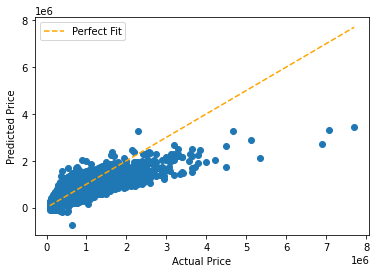

In [40]:
preds = model.predict(X)
fig,ax = plt.subplots()
perfect_line = np.arange(Y.min(), Y.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y, preds);
ax.set_xlabel("Actual Price");
ax.set_ylabel("Predicted Price");
ax.legend();

### 2. Normality

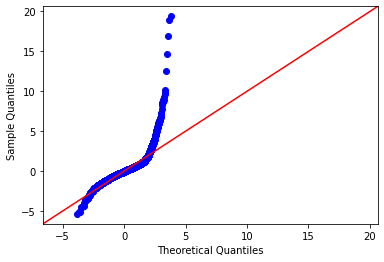

In [41]:
import scipy.stats as stats
residuals = (Y - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### 3. Homoscedasticity

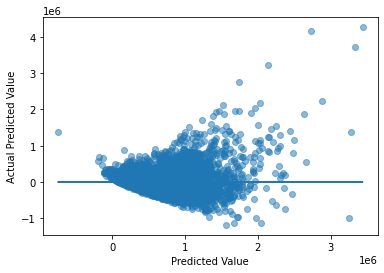

In [42]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

### Let's check for multicollinearity 

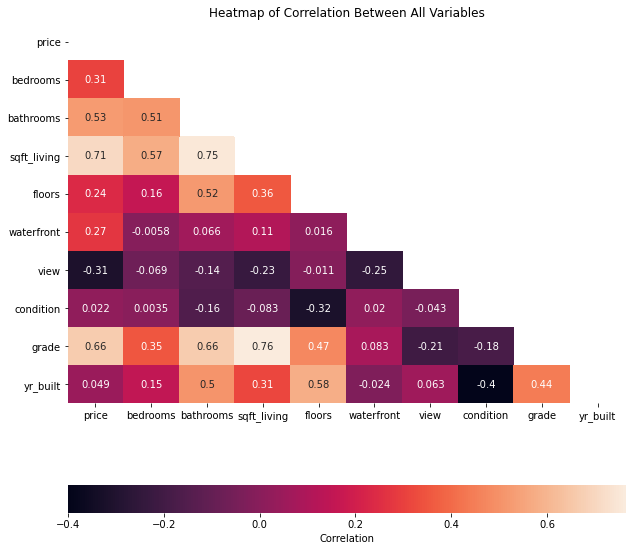

In [43]:
new_df = pd.concat([Y, X], axis = 1)
correlation = new_df.corr()

#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");

From testing our assumptions we can see:

* We have quite a few outliers, which disrupts the linear assumption
* The model residuals do not follow a full normal distribution
* Our residuals form a cone shape which indicates heteroscedasticity
* Multicollinearity (above .70) is not a major issue for our data

#### Let's see if we can adjust our model to fix any of the assumptions

# Third Model

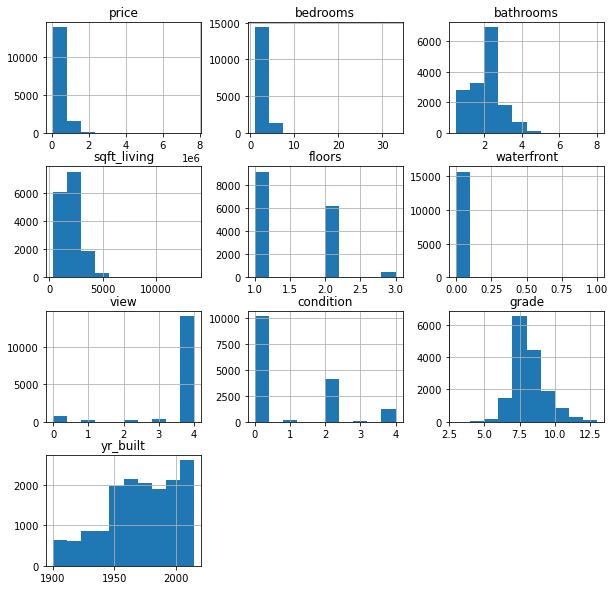

In [44]:
#Let's take a look at the distribution of the variables
df.hist(figsize = (10,10));

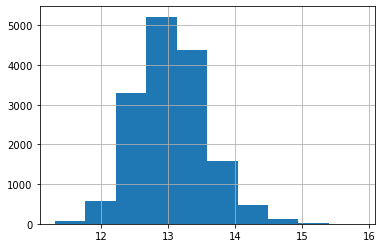

In [45]:
#Let's use log transformation on price to normalize the distribution and see how that effects our model
    
df["price"] = np.log(df["price"])
df["price"].hist();

#We'll drop view, since conceptually it doesn't make sense that our price would go down as the view rating increases
X = X.drop("view", axis = 1)

In [46]:
Y_log = df["price"]
new_df = pd.concat([Y_log, X], axis = 1)

outcome = "price"
X_sum = "+".join(X.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = new_df).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3508.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:19:21   Log-Likelihood:                -4183.9
No. Observations:               15762   AIC:                             8386.
Df Residuals:                   15753   BIC:                             8455.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.4266      0.224    100.009      0.000      21.987      22.866
bedrooms       -0.0239      0.003     -7.005      0.000      -0.031      -0.017
bathrooms       0.0907      0.006     15.549      0.000       0.079       0.102
sqft_living     0.0002    5.5e-06     31.893      0.000       0.000       0.000
floors          0.0783      0.006     12.862      0.000       0.066       0.090
waterfront      0.5037      0.029     17.202      0.000       0.446       0.561
condition       0.0171      0.002      7.805      0.000       0.013       0.021
grade           0.2267      0.004     62.155      0.000       0.220       0.234
yr_built       -0.0059      0.000    -50.725      0.000      -0.006      -0.006
==============================================================================
Omnibus:                       70.759   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.347
Skew:                          -0.128   Prob(JB):                     1.60e-17
Kurtosis:                       3.229   Cond. No.                     2.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking our assumptions again

### 1. Linearity

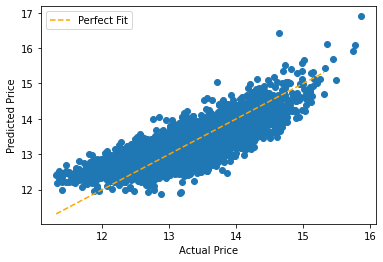

In [48]:
preds = model.predict(X)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### 2. Normality

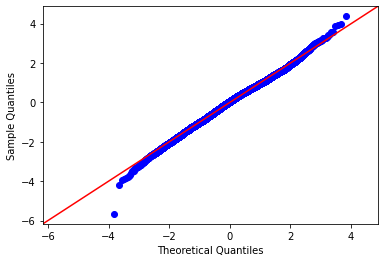

In [49]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### 3.  Homoscedasticity

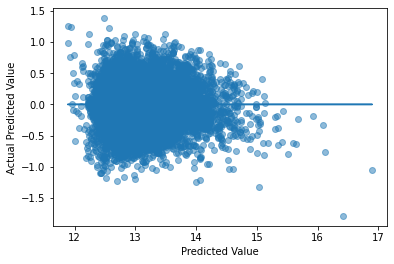

In [50]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

### Checking for multicollinearity

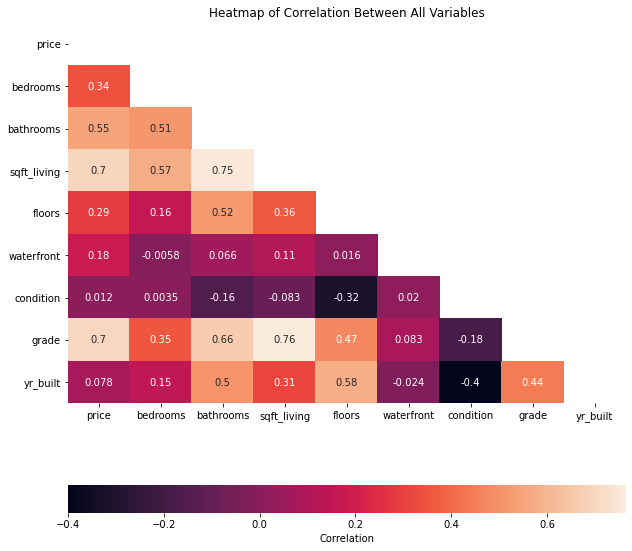

In [51]:
correlation = new_df.corr()

#Set up axes
fig, ax = plt.subplots(figsize=(10, 10))

#Create heatmap
sns.heatmap(data = correlation, 
            annot = True, 
            ax = ax, 
            mask= np.triu(np.ones_like(correlation, dtype=bool)),
            cbar_kws={"label": "Correlation","orientation": "horizontal"});

ax.set_title("Heatmap of Correlation Between All Variables");

After log transforming our price variable we can see that:
* Our linearity assumption has drastically improved
* The model residuals now follow a normal distribution
* Our residuals now form a more homoscedastic pattern
* Multicollinearity (above .70) is not a major issue for our data

### Let's also try log transforming the sqft_living variable  and see how that affects the data

In [52]:
#Log Transform
non_normal = ["sqft_living"]
for i in non_normal:
    X[i] = X[i].map(lambda x: np.log(x))
    


In [53]:
#Run model again

new_df = pd.concat([Y_log, X], axis = 1)

outcome = "price"
X_sum = "+".join(X.columns)
formula = outcome + "~" + X_sum 
model = ols(formula = formula, data = new_df).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     3528.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:19:23   Log-Likelihood:                -4155.3
No. Observations:               15762   AIC:                             8329.
Df Residuals:                   15753   BIC:                             8398.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      20.4636      0.236     86.531      0.000      20.000      20.927
bedrooms       -0.0360      0.004    -10.178      0.000      -0.043      -0.029
bathrooms       0.0918      0.006     15.884      0.000       0.080       0.103
sqft_living     0.3923      0.012     32.835      0.000       0.369       0.416
floors          0.0768      0.006     12.639      0.000       0.065       0.089
waterfront      0.5443      0.029     18.679      0.000       0.487       0.601
condition       0.0149      0.002      6.825      0.000       0.011       0.019
grade           0.2324      0.004     66.210      0.000       0.226       0.239
yr_built       -0.0063      0.000    -54.048      0.000      -0.006      -0.006
==============================================================================
Omnibus:                       34.709   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.196
Skew:                          -0.067   Prob(JB):                     3.08e-09
Kurtosis:                       3.204   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

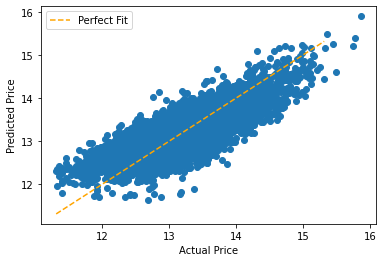

In [55]:
preds = model.predict(X)
fig,ax = plt.subplots()
perfect_line = np.arange(Y_log.min(), Y_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label = "Perfect Fit")
ax.scatter(Y_log, preds);
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

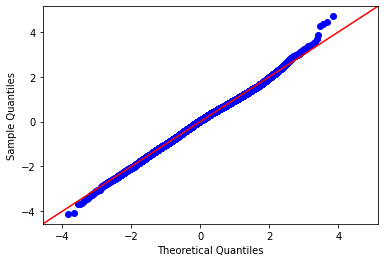

In [56]:
import scipy.stats as stats
residuals = (Y_log - preds)
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Homoscedasticity

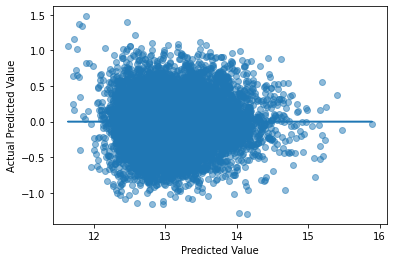

In [57]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Predicted Value");

## Results

### From our final data we can see that: 
* All our independent variable p values are less than 0.05, indicating the relationships between those variables and the target   variable price are statistically significant.
* Our R-squared score has improved slightly by .002
* Our assumption plots have not drastically changed

### Interpreting our results

In [58]:
model.params

Intercept      20.463581
bedrooms       -0.036029
bathrooms       0.091786
sqft_living     0.392289
floors          0.076761
waterfront      0.544310
condition       0.014931
grade           0.232389
yr_built       -0.006270
dtype: float64

First off, we can see that our base house price is about $19.99. Then from there, we can look at the coefficients. Because we log transformed our target variable price, our variable coefficients (apart from sqft_living) can be represented as percentage changes of price for each unit increase. The sqft_living coefficient will be interpreted as a percentage change in price for each percentage change in sqft_living. We will breakdown each variable coefficient below.

#### Bedroom and Bathroom Variables

First we have the bedroom and bathroom variables. For each additional bedroom added, our house price will go down by a certain percentage. In order to find that percentage we need to do some quick math involving the coefficient.

In [59]:
import math

bed_coeff = model.params["bedrooms"]
bed_percnt = 100 * (math.exp(bed_coeff) - 1)
bed_percnt

-3.538727479262549

Therefore according to our model, for each additional bedroom added our price will go down by about 3.38%. We can do the same thing for the bathrooms variable. 

In [60]:
bath_coeff = model.params["bathrooms"]
bath_percnt = 100 * (math.exp(bath_coeff)-1)
bath_percnt

9.613019835719982

For each additional bathroom addded, our house price will go up by about 9.3%. 

#### Sqft_living variable

Since both price and sqft_living are log transformed, we interpret the coefficient a little differently. This time, a 1% change in sqft_living will result in a percentage change in price. We'll again need to do some math.

In [61]:
sq_coeff = model.params["sqft_living"]
sq_percnt = 100 * ((pow(1.01, sq_coeff)-1))
sq_percnt

0.39110372968695906

Therefore, for each 1% change in sqft_living, the price will increase by 37%. 

#### Floors variable

In [62]:
floor_coeff = model.params["floors"]
floor_percnt = 100 * (math.exp(floor_coeff)-1)
floor_percnt

7.978425016282387

For each additional floor added, the price will increase by about 8.2%. 

#### Waterfront and condition variables

Here we have label encoded variables. We'll start off with the waterfront variable. Waterfront has 2 values: Yes and No. Let's do the same math we did before.

In [63]:
water_coeff = model.params["waterfront"]
water_percnt = 100 * (math.exp(water_coeff)-1)
water_percnt

72.34183173958027

Therefore if a house does have a waterfront view, we can expect the price to increase by about 72.3%.

Next, we have condition, which is the overall condition of the house related to maintenance of house. Condition has the following values: 'Average', 'Very Good', 'Good', 'Poor', and 'Fair'. The breakdown of the scale can be found at https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r.

In [64]:
cond_coeff = model.params["condition"]
cond_percnt = 100 * (math.exp(cond_coeff)-1)
cond_percnt

1.5042644751156464

For each increase in condition value ranking , the house price will increase by about 1.5%

#### The grade variable

The grade variable is the overall grade of the house based on construction and design of house. It's based on a 3-13 scale, which can be found at https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r.

In [69]:
grade_coeff = model.params["grade"]
grade_percnt = 100 * (math.exp(grade_coeff)-1)
grade_percnt

26.161008409042473

For each increase in grade value ranking, the house price will increase by about 26.2%.

#### The yr_built variable

Lastly, we have yr_built, which is what year the house was built.

In [68]:
year_coeff = model.params["yr_built"]
year_percnt = 100 * (math.exp(year_coeff)-1)
year_percnt

-0.6250414173200158

For each year newer the house is, the price will decrease by about .63%.

## Conclusion